In [1]:
import numpy as np
import pandas as pd
import cv2
import PIL
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import pathlib
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

ImportError: Traceback (most recent call last):
  File "c:\Users\Amr\AppData\Local\anaconda3\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [ ]:
import zipfile

zip_path = r"D:\grad_project\archive (2).zip"  # Full path to the ZIP file
extract_path = r"D:\grad_project"  # Change this if needed

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully to:", extract_path)


Dataset extracted successfully to: C:\Users\Amr\Documents\grad_project


In [5]:
import os

dataset_path = r"C:\Users\Amr\Documents\grad_project/skin-disease-datasaet" 

# List contents of the dataset directory
print("Contents of Dataset Folder:", os.listdir(dataset_path))

train_path = os.path.join(dataset_path, "train_set")
test_path = os.path.join(dataset_path, "test_set")

print("Train Path Exists:", os.path.exists(train_path))
print("Test Path Exists:", os.path.exists(test_path))

# If train_set exists, list categories inside
if os.path.exists(train_path):
    print("Train Categories:", os.listdir(train_path))

Contents of Dataset Folder: ['test_set', 'train_set']
Train Path Exists: True
Test Path Exists: True
Train Categories: ['BA- cellulitis', 'BA-impetigo', 'FU-athlete-foot', 'FU-nail-fungus', 'FU-ringworm', 'PA-cutaneous-larva-migrans', 'VI-chickenpox', 'VI-shingles']


In [6]:
dataset_url = r"C:\Users\Amr\Documents\grad_project/skin-disease-datasaet/train_set"
os.listdir(dataset_url)

['BA- cellulitis',
 'BA-impetigo',
 'FU-athlete-foot',
 'FU-nail-fungus',
 'FU-ringworm',
 'PA-cutaneous-larva-migrans',
 'VI-chickenpox',
 'VI-shingles']

In [7]:
import pathlib
data_dir = pathlib.Path(dataset_url)
data_dir

WindowsPath('C:/Users/Amr/Documents/grad_project/skin-disease-datasaet/train_set')

Total images in 'BA-cellulitis': 9


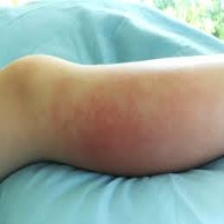

In [12]:
# Load an example image
cellulitis = list((data_dir / "BA- cellulitis").glob('*.jpeg'))
print(f"Total images in 'BA-cellulitis': {len(cellulitis)}")

# Display the first image
PIL.Image.open(str(cellulitis[3]))

In [13]:
import os

dataset_url = r"C:\Users\Amr\Documents\grad_project/skin-disease-datasaet/train_set"

print("Folders inside train_set:", os.listdir(dataset_url))

Folders inside train_set: ['BA- cellulitis', 'BA-impetigo', 'FU-athlete-foot', 'FU-nail-fungus', 'FU-ringworm', 'PA-cutaneous-larva-migrans', 'VI-chickenpox', 'VI-shingles']


In [14]:
labels = ['BA-cellulitis', 'FU-athlete-foot', 'VI-chickenpox', 'VI-shingles',
          'FU-nail-fungus', 'BA-impetigo', 'FU-ringworm', 'PA-cutaneous-larva-migrans']

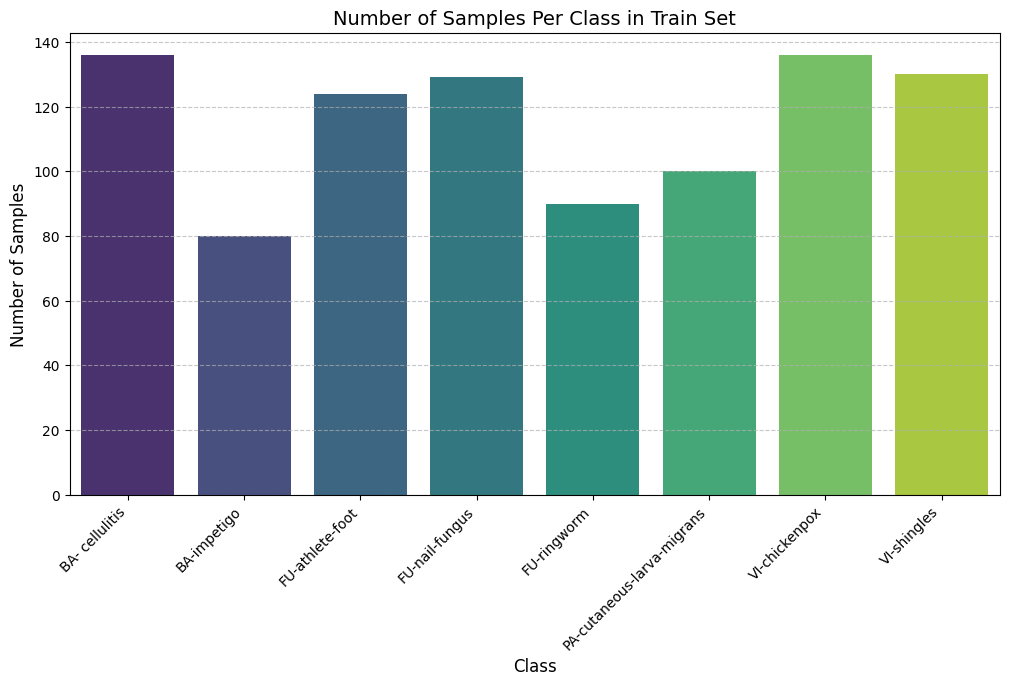

In [15]:
# Define the train set path
train_set_path = r"C:\Users\Amr\Documents\grad_project/skin-disease-datasaet/train_set"

# Get class labels (folder names) and the number of images in each
class_counts = {folder: len(os.listdir(os.path.join(train_set_path, folder))) 
                for folder in os.listdir(train_set_path) 
                if os.path.isdir(os.path.join(train_set_path, folder))}

# Convert dictionary to lists
labels = list(class_counts.keys())
counts = list(class_counts.values())

# Plot the distribution
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=labels, y=counts, palette="viridis")

ax.set_xlabel("Class", fontsize=12)
ax.set_ylabel("Number of Samples", fontsize=12)
plt.title("Number of Samples Per Class in Train Set", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [16]:
img_height = 224
img_width = 224
epochs=20

In [17]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_path,
    image_size=(224, 224),
    batch_size=32
)


Found 924 files belonging to 8 classes.


In [18]:
class_names = train_ds.class_names
print(class_names)

['BA- cellulitis', 'BA-impetigo', 'FU-athlete-foot', 'FU-nail-fungus', 'FU-ringworm', 'PA-cutaneous-larva-migrans', 'VI-chickenpox', 'VI-shingles']


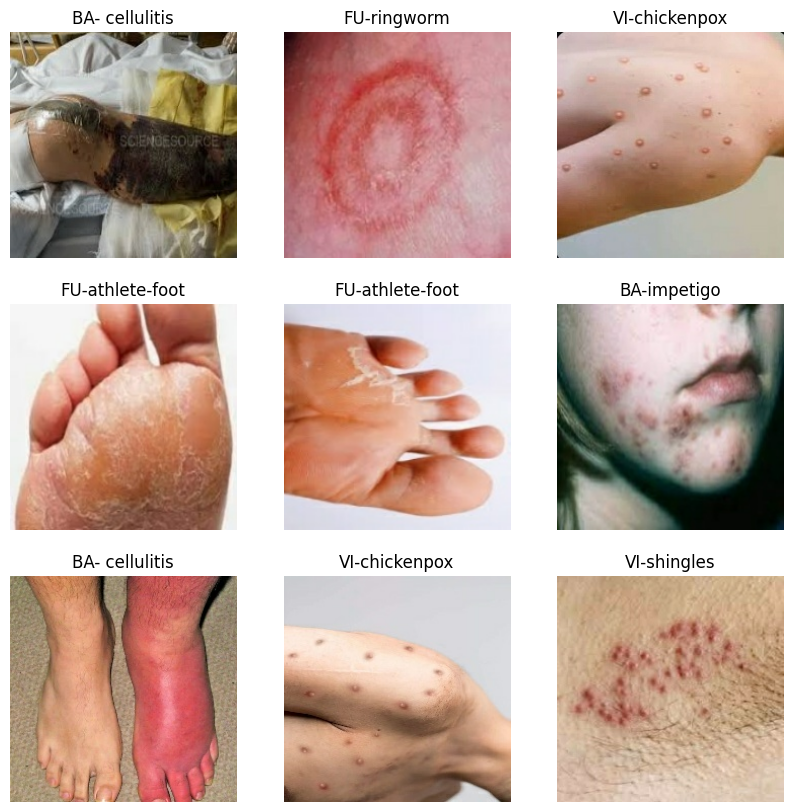

In [19]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = r"C:\Users\Amr\Documents\grad_project/skin-disease-datasaet/train_set"
# Define the train and validation data generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  
)

# Create the train dataset generator
train_ds = train_datagen.flow_from_directory(
    train_dir,  
    target_size=(224, 224),  
    batch_size=32,
    class_mode='sparse',
    subset='training'  
)

# Create the validation dataset generator
val_ds = train_datagen.flow_from_directory(
    train_dir,  
    target_size=(224, 224),  
    batch_size=32,
    class_mode='sparse',
    subset='validation'  
)


Found 741 images belonging to 8 classes.
Found 183 images belonging to 8 classes.


In [23]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4460 - loss: 1.6670 - val_accuracy: 0.7486 - val_loss: 0.7848
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8322 - loss: 0.5392 - val_accuracy: 0.7596 - val_loss: 0.6389
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8694 - loss: 0.4665 - val_accuracy: 0.8634 - val_loss: 0.4403
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9058 - loss: 0.3145 - val_accuracy: 0.8087 - val_loss: 0.5473
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9280 - loss: 0.2590 - val_accuracy: 0.8852 - val_loss: 0.3404
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9343 - loss: 0.2185 - val_accuracy: 0.8962 - val_loss: 0.3154
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9313 - loss: 0.2126 - val_accuracy: 0.8197 - val_loss: 0.5425
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9359 - loss: 0.2179 - val_accuracy: 0.8907 - val_loss:

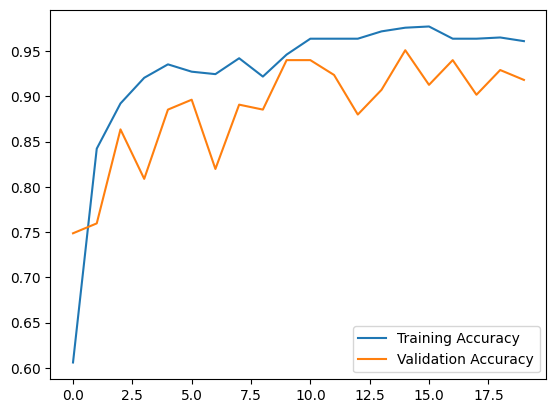

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

In [29]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=(224, 224),
    batch_size=32,
    shuffle=False
)

loss, accuracy = model.evaluate(test_ds)

Found 233 files belonging to 8 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 684ms/step - accuracy: 0.2047 - loss: 3.6483


In [30]:
# Evaluate the model on the test dataset
# loss, accuracy = model.evaluate(test_generator)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 3.3935
Test Accuracy: 0.2361


In [31]:
# Predict on the test dataset
y_predict = model.predict(test_generator)

# Convert softmax probabilities to class labels
y_predicted_labels = np.argmax(y_predict, axis=1)

# Convert to NumPy array (optional)
y_predicted_labels = np.array(y_predicted_labels)

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 951ms/step


In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get true labels from test_generator
y_test = test_generator.classes  # Extracts the true class labels

# Generate classification report
print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_predicted_labels)
print("Confusion Matrix:\n", conf_matrix)

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.87      1.00      0.93        20
           2       0.93      0.88      0.90        32
           3       0.91      0.97      0.94        33
           4       1.00      0.78      0.88        23
           5       0.79      0.92      0.85        25
           6       1.00      1.00      1.00        34
           7       0.94      0.88      0.91        33

    accuracy                           0.93       233
   macro avg       0.93      0.92      0.92       233
weighted avg       0.93      0.93      0.93       233

Confusion Matrix:
 [[32  0  0  0  0  1  0  0]
 [ 0 20  0  0  0  0  0  0]
 [ 0  2 28  0  0  2  0  0]
 [ 0  0  1 32  0  0  0  0]
 [ 1  0  0  2 18  0  0  2]
 [ 0  0  1  1  0 23  0  0]
 [ 0  0  0  0  0  0 34  0]
 [ 0  1  0  0  0  3  0 29]]


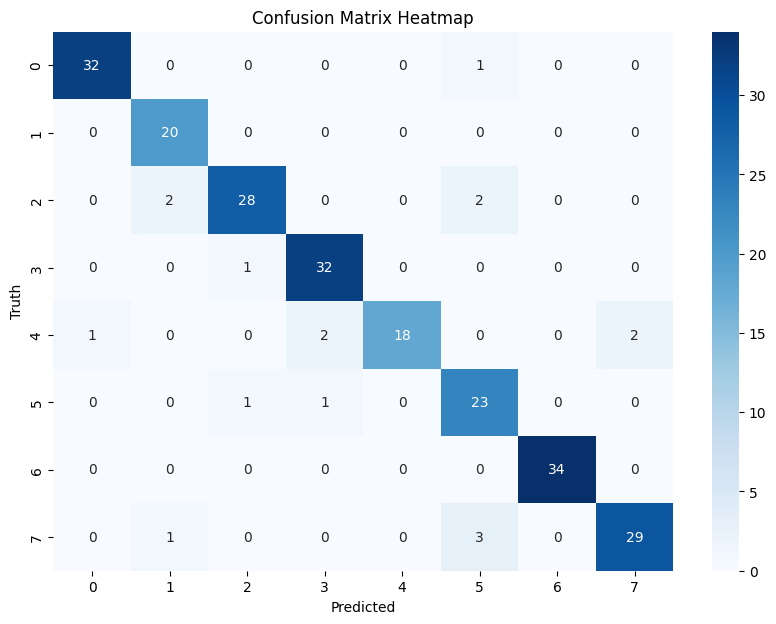

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_predicted_labels)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")

plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [39]:
model.save("skin_disease_model.h5")
print("Model saved successfully.")

Model saved successfully.
